# **Exploratory Data Analysis on Online Course Enrollment Data**


Before we keep our heads down building a cool personalized online courses recommender system, we always need to take a look at data first since it is the essence of any machine learning system. We need to explore what kind of data we will need and what such data would look like.

Let's apply our EDA skills to online courses related datasets such as course titles/genres and course enrollments. 

## Objectives


* Identify keywords in course titles using a WordCloud
* Calculate the summary statistics and visualizations of the online course content dataset
* Determine popular course genres
* Calculate the summary statistics and create visualizations of the online course enrollment dataset
* Identify courses with the greatest number of enrolled students


----


At the beginning, we need to install two required Python packages:


In [1]:
!pip install seaborn==0.11.1
!pip install wordcloud==1.8.1

and import necessary class/methods in the packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [3]:
# also set a random state
rs = 123

### Load and explore the dataset


First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.


In [4]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [5]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

We will start by exploring the course genre dataset. Let's first check its columns/features name:


In [6]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.


We can also check how many unique courses we have in this dataset:


In [7]:
course_df.shape[0]

307

Then we can take a quick look at its header rows


In [8]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [9]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

As we can see, the `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.


For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [10]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.


### Plot a Word Cloud from Course Titles


First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [11]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [12]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

We also want to filter common stop words and some less meaningful words:


In [13]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Then, we create a ```WordCloud``` object and generate ```wordcloud``` from the titles.


In [14]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [15]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


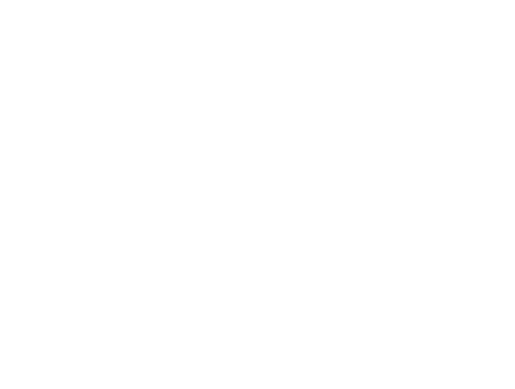

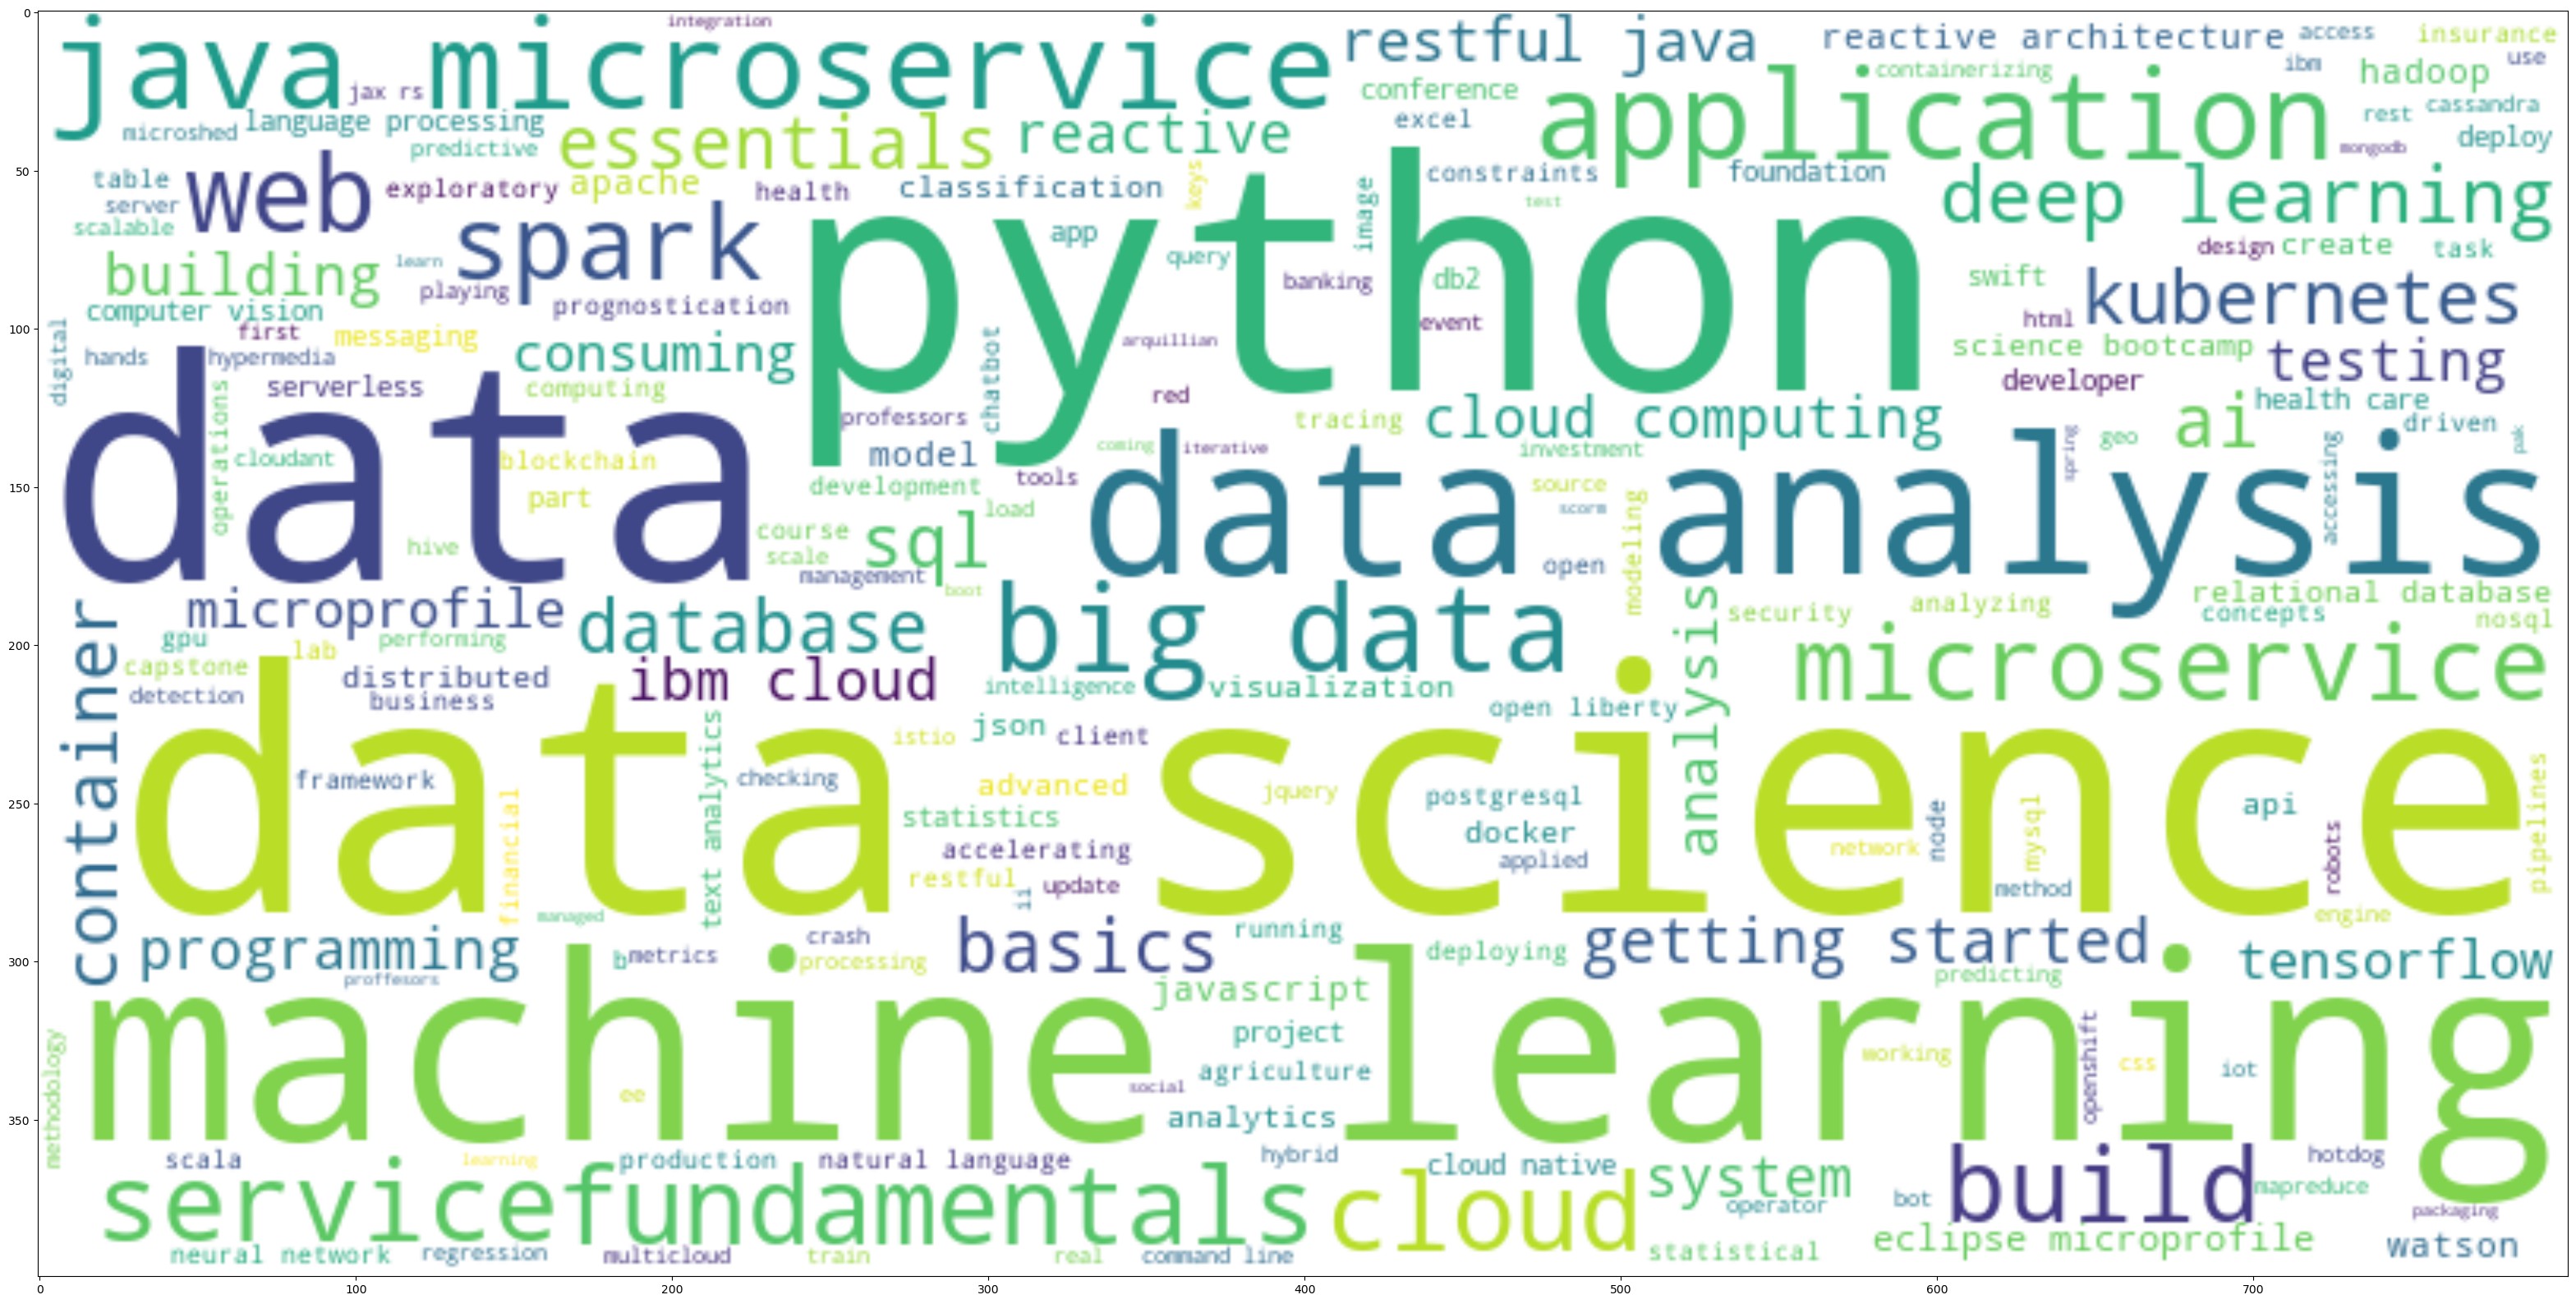

In [16]:
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

As we can see from the ```wordcloud```,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.


### Analyze Course Genres


First, let's try to find out which courses may be of interest. For example, what are the all machine learning related courses?

In [17]:
indexes = course_df['MachineLearning'] == 1
ml_courses = course_df[indexes]
print(ml_courses)

      COURSE_ID                                              TITLE  Database  \
1      ML0122EN                accelerating deep learning with gpu         0   
15     DAI101EN                               data   ai essentials         0   
19     HCC105EN           ybrid cloud conference  ai pipelines lab         0   
21     DS0132EN                  data   ai  jumpstart your journey         0   
24     BENTEST4                 ai for everyone  master the basics         0   
..          ...                                                ...       ...   
274  excourse61        convolutional neural networks in tensorflow         0   
282  excourse69                     machine learning with big data         0   
290  excourse77  natural language processing with attention models         0   
291  excourse78   natural language processing with sequence models         0   
292  excourse79  natural language processing with probabilistic...         0   

     Python  CloudComputing  DataAnalys

All courses with genres `MachineLearning` == 1 and `BigData` == 1_


In [18]:
indexes1 = (course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1)
ml_and_bigdata_courses = course_df[indexes]
print(ml_and_bigdata_courses)

      COURSE_ID                                              TITLE  Database  \
1      ML0122EN                accelerating deep learning with gpu         0   
15     DAI101EN                               data   ai essentials         0   
19     HCC105EN           ybrid cloud conference  ai pipelines lab         0   
21     DS0132EN                  data   ai  jumpstart your journey         0   
24     BENTEST4                 ai for everyone  master the basics         0   
..          ...                                                ...       ...   
274  excourse61        convolutional neural networks in tensorflow         0   
282  excourse69                     machine learning with big data         0   
290  excourse77  natural language processing with attention models         0   
291  excourse78   natural language processing with sequence models         0   
292  excourse79  natural language processing with probabilistic...         0   

     Python  CloudComputing  DataAnalys

In [19]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.


In [20]:
# Sum the values for each genre
genre_sums = course_df[genres].sum(axis=0)

# Convert the result into a DataFrame with a column named 'Count'
course_count_df = pd.DataFrame(genre_sums, columns=['Count'])

# Sort the DataFrame by the 'Count' column in descending order
sorted_course_count_df = course_count_df.sort_values(by='Count', ascending=False)

# Display the sorted DataFrame
print(sorted_course_count_df)

                 Count
BackendDev          78
MachineLearning     69
Database            60
DataAnalysis        56
DataScience         38
CloudComputing      37
BigData             36
Python              28
FrontendDev         19
Containers          17
R                   17
ComputerVision      10
Chatbot              4
Blockchain           4


We can also vsiaulize course genre counts using a bar chart:


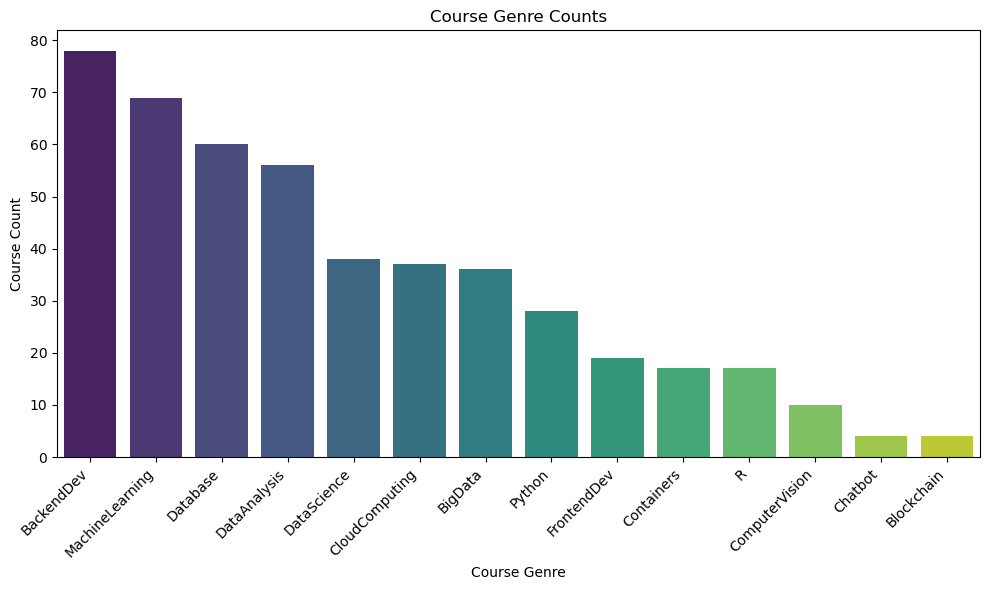

In [21]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_course_count_df.index, y='Count', data=sorted_course_count_df, palette='viridis')
plt.xlabel('Course Genre')
plt.ylabel('Course Count')
plt.title('Course Genre Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Now, you should have some solid understanding about all course metadata including the keywords in titles and popular course genres. Next, we will switch gears to exploring course learners related datasets.


###  Analyze Course Enrollments


Let's first take a look at the course enrollments dataset.


In [22]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing a course enrollment mode.


In an online learning scenario, we have learners or students as users who enrolled courses. In fact, to follow the standard recommender system naming convention, we call each learner as a `user`, each course an `item`, and the enrollment mode or interaction as `rating`. So that's why we have columns named `user`, `item`, and `rating` instead of using `learner`, `course`, and `enrollment`.

In this project, we may use these terms interchangeably.


In [23]:
ratings_df['rating'].unique()

array([3., 2.])

The rating column contains one of two values: `2` means the user just audited the course without completing it and `3` means the user completed the course and earned a certificate.
Two other possible values are not explicitly available in this project: `0` or `NA` means the user has no interaction with the course and `1` means the user just browsed the course.


Let's see how many ratings/enrollment we have in the dataset:


In [24]:
ratings_df.shape[0]

233306

We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:


In [25]:
# Group by 'user' and calculate the size of each group (number of ratings per user)
user_rating_counts = ratings_df.groupby('user').size()

# Report the total number of users after aggregation
total_users = user_rating_counts.shape[0]

print(f'Total number of users after aggregation: {total_users}')

Total number of users after aggregation: 33901


In [26]:
# Use describe() to report the statistics summary of user ratings count
user_rating_counts.describe()

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64

We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.


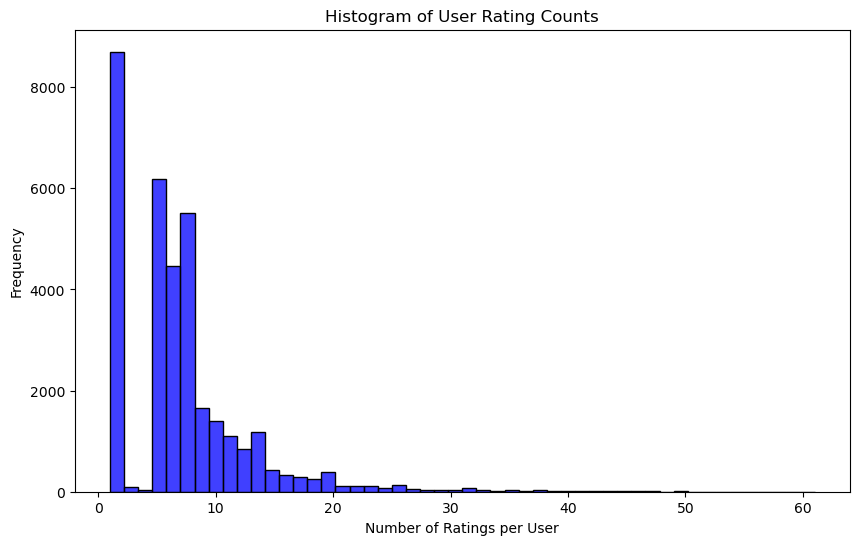

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(user_rating_counts, bins=50, kde=False, color='blue')
plt.title('Histogram of User Rating Counts')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.show()

### Find the Top-20 Most Popular Courses


Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.


In [28]:
# Group by 'item' and calculate the rating count for each course
course_ratings_count = ratings_df.groupby('item').size().reset_index(name='Ratings')

# Sort the courses by rating count in descending order
top_courses = course_ratings_count.sort_values(by='Ratings', ascending=False).reset_index(drop=True)

# Select the top 20 courses
top_20_courses = top_courses.head(20)

# Display the result
print(top_20_courses)

          item  Ratings
0     PY0101EN    14936
1     DS0101EN    14477
2     BD0101EN    13291
3     BD0111EN    10599
4     DA0101EN     8303
5     DS0103EN     7719
6   ML0101ENv3     7644
7     BD0211EN     7551
8     DS0105EN     7199
9     BC0101EN     6719
10    DV0101EN     6709
11    ML0115EN     6323
12    CB0103EN     5512
13    RP0101EN     5237
14    ST0101EN     5015
15    CC0101EN     4983
16    CO0101EN     4480
17    DB0101EN     3697
18    BD0115EN     3670
19    DS0301EN     3624


In [29]:
# WRITE YOUR CODE HERE
# Merge the top_courses DataFrame with the course_df DataFrame based on the 'item' and 'COURSE_ID' columns
top_courses_with_titles = pd.merge(top_courses, course_df[['COURSE_ID', 'TITLE']], how='left', left_on='item', right_on='COURSE_ID')

# Select the columns you want to display
result = top_courses_with_titles[['TITLE', 'Ratings']]

# Display the result
print(result)

                                                 TITLE  Ratings
0                              python for data science    14936
1                         introduction to data science    14477
2                                         big data 101    13291
3                                           hadoop 101    10599
4                            data analysis with python     8303
..                                                 ...      ...
121                                     statistics 201        1
122                                     statistics 301        1
123  data science bootcamp with r for university pr...        1
124  data science bootcamp with python for universi...        1
125  enabling distributed tracing in microservices ...        1

[126 rows x 2 columns]


It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [30]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

In [31]:
top = 0

In [32]:
# Get the sum of ratings for the top-20 courses
top_courses_sum = top_courses['Ratings'].sum()

# Get the total sum of all ratings
total_ratings_sum = ratings_df['rating'].sum()

# Calculate the percentage
percentage_top_courses = (top_courses_sum / total_ratings_sum) * 100

# Display the result
print(f"Percentage of top-20 course enrollments: {percentage_top_courses:.2f}%")

Percentage of top-20 course enrollments: 33.86%


### Summary


We performed exploratory data analysis on the course metadata and course enrollments datasets and obtained some preliminary understanding. 